# Sustainable Energy Growth

In this notebook we will be exploring energy consumption patterns, across multiple countries worldwide from 2000 to 2020. Diving into renewable energy consumption and financial flows, gaining insight for energy forecasting. The objective is to build better investment strategies which can serve as a guide for future investors to sustainable energy, in accordance with the United Nations' Sustainable Development Goal 7, to "ensure access to affordable, reliable, sustainable and modern energy for all".

This dataset is thanks to Ansh Tanwar from Kaggle;

>Tanwar, A. (2023). *Global data on sustainable energy (2000-2020)*. Kaggle. Retrieved from https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data. https://doi.org/10.34740/KAGGLE/DSV/6327347

Here are some Key Features to make note of:
    
>**Access to clean fuels for cooking**: The proportion of the population that primarily depends on clean fuels.
>
>**Access to electricity (% of population)**: Population of people with access to electricity, in percentage.
>
>**Electricity from fossil fuels (TWh)**: Terawatt-hours of electricity produced from fossil fuels (coal, oil, gas).
>
>**Electricity from renewables (TWh)**: Terawatt-hours of electricity produced from renewable resources (wind, solar, hydro, etc.).
>
>**Entity**: Name of the country where the data has been collected.
>
>**Financial flows to developing countries (US $)**: Financial from developed countries to build sustainable energy projects, in US Dollars.
>
>**Land Area(Km2)**: Square kilometers of total land area.
>
>**Renewable energy share in the total final energy consumption (%)**: A country's total final energy consumption that comes from renewable energy, in percentage.
>
>**Renewable-electricity-generating-capacity-per-capita**: Renewable energy capacity installed given country.
>given country.
>
>**Value_co2_emissionsMetric tons of carbon dioxide emission per person.
>
>**Year**: Year of data collection.
> data cisllection.


With the foundation laid out, we can start investigating the data.

 ## Importing Libraries and Dataset

In [70]:
#Importing the necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import joblib

In [5]:
# Function to load a dataset into a Pandas DataFrame
def load_dataframe(dataset_pathway):
    dataframe = pd.read_csv(dataset_pathway)
    display(dataframe.head())  # Display first 5 rows to confirm loading
    return dataframe

if __name__ == "__main__":
    dataset_path = r"C:\Users\Nuzhat Ibrahimy\Sustainable Energy Growth Project\global-data-on-sustainable-energy (1).csv"
    energy_data = load_dataframe(dataset_path)

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [6]:
# Function to display a summary of the dataframe
def dataframe_summary(dataframe):
    print("\nDataset Info:")
    dataframe.info()  # Prints non-null count and datatypes
    
    print("\nDataset Statistical Summary:")
    display(dataframe.describe())  # Displays statistical summary

if __name__ == "__main__":
    dataframe_summary(energy_data)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from f

Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        2718.000000      
mean                                          113.137498      
std                                           244.167256      
min                                             0.000000      
25%                                             3.540000      
50%                                            32.910000      
75%                                           112.210000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    1.560000e+03   
mean                                     9.422400e+07   
std                                      2.981544e+08   
min                                      0.000000e+00   
25%                                      2.600000e+05   
50%                                      5.665000e+06   
75%                                      5.534750e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3455.000000                  
mean                                           32.638165                  
std                                            29.894901                  
min                                             0.000000                  
25%                                             6.515000                  
50%                                            23.300000                  
75%                                            55.245000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3628.000000                     3523.000000   
mean                             70.365003                       13.450190   
std                             348.051866                       73.006623   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.837500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3628.000000   
mean                           23.968010   
std                           104.431085   
min                             0.000000   
25%                             0.040000   
50%                             1.470000   
75%                             9.600000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                36.801182   
std                                 34.31488

## Preprocessing the Data

A lot of datasets will have missing data due to issues during the data collection process, so this will need to be handled accordingly.

In [8]:
# Function to display missing values as a percentage
def find_missing_data(dataframe):
    missing_data = dataframe.isnull().sum()
    missing_percentage = (missing_data / len(dataframe)) * 100
    missing_df = pd.DataFrame({
        "Missing Values": missing_data,
        "Percentage (%)": missing_percentage
    })
    return missing_df

if __name__ == "__main__":
    missing_info = find_missing_data(energy_data)
    display(missing_info)

Missing Values  \
Entity                                                           0   
Year                                                             0   
Access to electricity (% of population)                         10   
Access to clean fuels for cooking                              169   
Renewable-electricity-generating-capacity-per-c...             931   
Financial flows to developing countries (US $)                2089   
Renewable energy share in the total final energ...             194   
Electricity from fossil fuels (TWh)                             21   
Electricity from nuclear (TWh)                                 126   
Electricity from renewables (TWh)                               21   
Low-carbon electricity (% electricity)                          42   
Primary energy consumption per capita (kWh/person)               0   
Energy intensity level of primary energy (MJ/$2...             207   
Value_co2_emissions_kt_by_country                              428   
Renewables (% equivalent primary energy)                      2137   
gdp_growth                                                     317   
gdp_per_capita                                                 282   
Density\n(P/Km2)                                                 1   
Land Area(Km2)                                                   1   
Latitude                                                         1   
Longitude                                                        1   

                                                    Percentage (%)  
Entity                                                    0.000000  
Year                                                      0.000000  
Access to electricity (% of population)                   0.274048  
Access to clean fuels for cooking                         4.631406  
Renewable-electricity-generating-capacity-per-c...       25.513839  
Financial flows to developing countries (US $)           57.248561  
Renewable energy share in the total final energ...        5.316525  
Electricity from fossil fuels (TWh)                       0.575500  
Electricity from nuclear (TWh)                            3.453001  
Electricity from renewables (TWh)                         0.575500  
Low-carbon electricity (% electricity)                    1.151000  
Primary energy consumption per capita (kWh/person)        0.000000  
Energy intensity level of primary energy (MJ/$2...        5.672787  
Value_co2_emissions_kt_by_country                        11.729241  
Renewables (% equivalent primary energy)                 58.563990  
gdp_growth                                                8.687312  
gdp_per_capita                                            7.728145  
Density\n(P/Km2)                                          0.027405  
Land Area(Km2)                                            0.027405  
Latitude                                                  0.027405  
Longitude                                                 0.027405

In [9]:
def impute_missing_values(dataframe):
    """Impute missing values using mean, median, and interpolation."""
    
    # Mean imputation for Renewable-electricity-generating-capacity-per-capita
    dataframe['Renewable-electricity-generating-capacity-per-capita'] = (
        dataframe['Renewable-electricity-generating-capacity-per-capita'].fillna(
            dataframe['Renewable-electricity-generating-capacity-per-capita'].mean()
        )
    )

    # Median imputation for Value_co2_emissions_kt_by_country
    dataframe['Value_co2_emissions_kt_by_country'] = (
        dataframe['Value_co2_emissions_kt_by_country'].fillna(
            dataframe['Value_co2_emissions_kt_by_country'].median()
        )
    )

    # Global mean imputation for high-missing-value columns
    high_missing_cols = [
        'Financial flows to developing countries (US $)', 
        'Renewables (% equivalent primary energy)'
    ]
    
    for col in high_missing_cols:
        dataframe[col] = dataframe[col].fillna(dataframe[col].mean())

    # Applying linear interpolation for numeric columns
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    dataframe[numeric_cols] = dataframe[numeric_cols].interpolate(method='linear')

    return dataframe

if __name__ == "__main__":
    energy_data = impute_missing_values(energy_data)

    # Check that no null values remain
    missing_info = find_missing_data(energy_data)
    display(missing_info)

Missing Values  \
Entity                                                           0   
Year                                                             0   
Access to electricity (% of population)                          0   
Access to clean fuels for cooking                                0   
Renewable-electricity-generating-capacity-per-c...               0   
Financial flows to developing countries (US $)                   0   
Renewable energy share in the total final energ...               0   
Electricity from fossil fuels (TWh)                              0   
Electricity from nuclear (TWh)                                   0   
Electricity from renewables (TWh)                                0   
Low-carbon electricity (% electricity)                           0   
Primary energy consumption per capita (kWh/person)               0   
Energy intensity level of primary energy (MJ/$2...               0   
Value_co2_emissions_kt_by_country                                0   
Renewables (% equivalent primary energy)                         0   
gdp_growth                                                       3   
gdp_per_capita                                                   2   
Density\n(P/Km2)                                                 1   
Land Area(Km2)                                                   0   
Latitude                                                         0   
Longitude                                                        0   

                                                    Percentage (%)  
Entity                                                    0.000000  
Year                                                      0.000000  
Access to electricity (% of population)                   0.000000  
Access to clean fuels for cooking                         0.000000  
Renewable-electricity-generating-capacity-per-c...        0.000000  
Financial flows to developing countries (US $)            0.000000  
Renewable energy share in the total final energ...        0.000000  
Electricity from fossil fuels (TWh)                       0.000000  
Electricity from nuclear (TWh)                            0.000000  
Electricity from renewables (TWh)                         0.000000  
Low-carbon electricity (% electricity)                    0.000000  
Primary energy consumption per capita (kWh/person)        0.000000  
Energy intensity level of primary energy (MJ/$2...        0.000000  
Value_co2_emissions_kt_by_country                         0.000000  
Renewables (% equivalent primary energy)                  0.000000  
gdp_growth                                                0.082214  
gdp_per_capita                                            0.054810  
Density\n(P/Km2)                                          0.027405  
Land Area(Km2)                                            0.000000  
Latitude                                                  0.000000  
Longitude                                                 0.000000

In [10]:
# Function to drop null values
def drop_null_values(dataframe):
    dataframe = dataframe.dropna()
    return dataframe

if __name__ == "__main__":
    energy_data = drop_null_values(energy_data)

    # Check that no null values remain
    missing_info = find_missing_data(energy_data)
    display(missing_info)

    # Display dataset summary
    dataframe_summary(energy_data)

Missing Values  \
Entity                                                           0   
Year                                                             0   
Access to electricity (% of population)                          0   
Access to clean fuels for cooking                                0   
Renewable-electricity-generating-capacity-per-c...               0   
Financial flows to developing countries (US $)                   0   
Renewable energy share in the total final energ...               0   
Electricity from fossil fuels (TWh)                              0   
Electricity from nuclear (TWh)                                   0   
Electricity from renewables (TWh)                                0   
Low-carbon electricity (% electricity)                           0   
Primary energy consumption per capita (kWh/person)               0   
Energy intensity level of primary energy (MJ/$2...               0   
Value_co2_emissions_kt_by_country                                0   
Renewables (% equivalent primary energy)                         0   
gdp_growth                                                       0   
gdp_per_capita                                                   0   
Density\n(P/Km2)                                                 0   
Land Area(Km2)                                                   0   
Latitude                                                         0   
Longitude                                                        0   

                                                    Percentage (%)  
Entity                                                         0.0  
Year                                                           0.0  
Access to electricity (% of population)                        0.0  
Access to clean fuels for cooking                              0.0  
Renewable-electricity-generating-capacity-per-c...             0.0  
Financial flows to developing countries (US $)                 0.0  
Renewable energy share in the total final energ...             0.0  
Electricity from fossil fuels (TWh)                            0.0  
Electricity from nuclear (TWh)                                 0.0  
Electricity from renewables (TWh)                              0.0  
Low-carbon electricity (% electricity)                         0.0  
Primary energy consumption per capita (kWh/person)             0.0  
Energy intensity level of primary energy (MJ/$2...             0.0  
Value_co2_emissions_kt_by_country                              0.0  
Renewables (% equivalent primary energy)                       0.0  
gdp_growth                                                     0.0  
gdp_per_capita                                                 0.0  
Density\n(P/Km2)                                               0.0  
Land Area(Km2)                                                 0.0  
Latitude                                                       0.0  
Longitude                                                      0.0


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3645 entries, 3 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3645 non-null   object 
 1   Year                                                              3645 non-null   int64  
 2   Access to electricity (% of population)                           3645 non-null   float64
 3   Access to clean fuels for cooking                                 3645 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3645 non-null   float64
 5   Financial flows to developing countries (US $)                    3645 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3645 non-null   float64
 7   Electricity from fossil

Year  Access to electricity (% of population)  \
count  3645.000000                              3645.000000   
mean   2010.048560                                78.860577   
std       6.049657                                30.300571   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.501240   
50%    2010.000000                                98.280970   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3645.000000   
mean                           63.397682   
std                            38.828349   
min                             0.000000   
25%                            23.900000   
50%                            82.900000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        3645.000000      
mean                                          113.061698      
std                                           210.587883      
min                                             0.000000      
25%                                             8.350000      
50%                                            70.290000      
75%                                           113.137498      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    3.645000e+03   
mean                                     9.430043e+07   
std                                      1.950000e+08   
min                                      0.000000e+00   
25%                                      1.187000e+07   
50%                                      9.422400e+07   
75%                                      9.422400e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3645.000000                  
mean                                           32.494846                  
std                                            29.539102                  
min                                             0.000000                  
25%                                             6.740000                  
50%                                            23.560000                  
75%                                            54.280000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3645.000000                     3645.000000   
mean                             70.094649                       13.176734   
std                             347.261580                       71.812324   
min                               0.000000                        0.000000   
25%                               0.300000                        0.000000   
50%                               2.990000                        0.000000   
75%                              26.550000                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3645.000000   
mean                           23.860314   
std                           104.199089   
min                             0.000000   
25%                             0.050000   
50%                             1.430000   
75%                             9.560000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3645.000000   
mean                                36.935319   
std                                 34.26025

## Visualising the Data

We will be focusing on key columns related to renewable energy and investments, to identify trends and anomalies. The best way to do this is through various types of visualisations.

### Initial Analysis

We will begin with a cursory investigation of the data to review the consumption of energy and the financial aid being offered.

Plotting a histogram of the final energy consumption percentage to get a preliminary idea on the overall reliance on renewable energy. What can be seen is, as expected, a lower frequency for renewable energy use as the data approaches 100%. With all countries utilising non-renewable energy sources in some way.

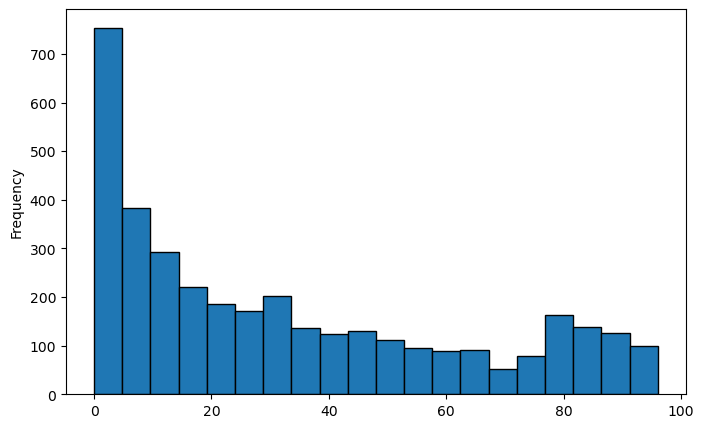

In [14]:
# Function to plot histogram
def plot_histogram(dataframe, column_name, bins=20):
    """Plots a histogram for a specified column in a DataFrame."""
    plt.figure(figsize=(8, 5))
    dataframe[column_name].plot(kind='hist', bins=bins, edgecolor='black')

    # Show the plot
    plt.show()

if __name__ == "__main__":
    plot_histogram(energy_data, 'Renewable energy share in the total final energy consumption (%)')

The box-and-whisker diagram shows significant outliers, both for countries that are receiving little to no financial aid, and those receiving a substantial amount. However, there is clearly more countires on the lower end, signifying many developing countries that have unfortunately not received enough financial aid.

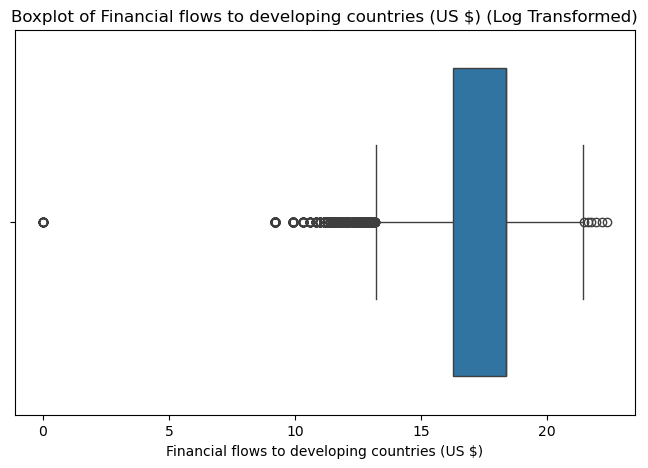

In [16]:
# Function to plot boxplot
def plot_boxplot(dataframe, column_name):
    # Boxplots to detect outliers
    plt.figure(figsize=(8, 5)) 
    sns.boxplot(x=np.log1p(dataframe[column_name]))

    # Add title and labels
    plt.title(f'Boxplot of {column_name} (Log Transformed)')
    plt.xlabel(column_name)

    # Show the plot
    plt.show()

if __name__ == "__main__":
    plot_boxplot(energy_data, 'Financial flows to developing countries (US $)')

### Entity Analysis

Let's dive into the countries that are receiving the most financial aid, and those receiving the least.

A look into the top 10 countries (i.e. entities), shows a disparity in the top countries that receive financial aid (e.g., India, Pakistan, and Nigeria) and the top countries that use renewable energy (e.g., Bhutan, Burundi, and Central African Republic). This could suggest that high financial aid does not necessarily translate to high renewable energy adoption.

Ethiopia is the only exception by being on both lists, indicating effective utilisation of financial aid for renewable energy adoption.

However, it should be considered that many countries with high renewable energy shares are smaller economies and may have a natural advantage due to lower energy demands. Additionally, the countries that receive the highest financial aid, are part of the top 20 most populated countries in the world, with the exception of Morocco, Argentina and Chile.

The box-and-whisker diagram shows significant lack of consistency within the top renewable energy users. For example, Mozambique has a wide range, suggesting inconsistent adoption or fluctuations in renewable energy share over time.

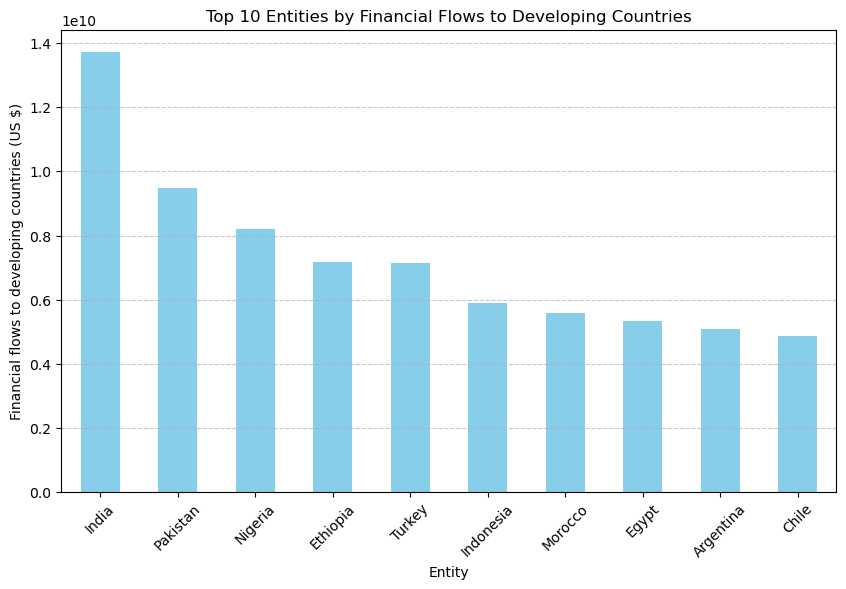

In [19]:
# Function to define the top entities
def top_entities(dataframe, column_name, group_by_column, top_n=10):
    top_entities = dataframe.groupby(group_by_column)[column_name].sum().nlargest(top_n)
    top_entities.name = column_name
    return top_entities

# Function to plot bar chart for top entities
def plot_by_group(top_entities, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    top_entities.plot(kind='bar', color='skyblue')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

if __name__ == "__main__":
    top_entities_financial_flows = top_entities(energy_data, 'Financial flows to developing countries (US $)', 'Entity', 10)

    plot_by_group(
        top_entities_financial_flows, 
        x_label="Entity", 
        y_label="Financial flows to developing countries (US $)", 
        title="Top 10 Entities by Financial Flows to Developing Countries"
    )

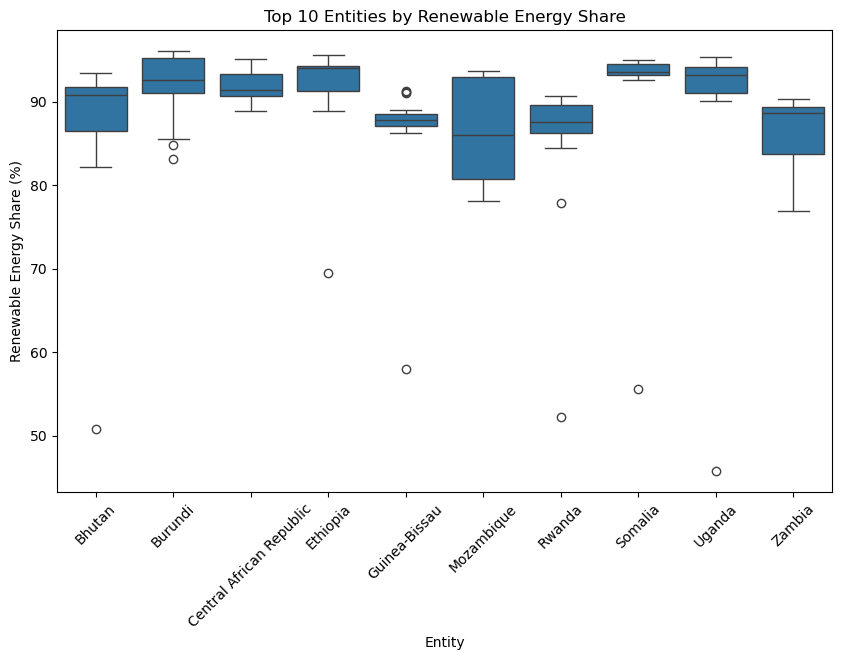

In [20]:
# Function to plot box-and-whisker diagram for top entities
def plot_by_group_boxplot(dataframe, top_entities, group_by_column, column_name, x_label, y_label, title):
    # Filter dataset based on top entities
    filtered_data = dataframe[dataframe[group_by_column].isin(top_entities.index)]

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_data, x=group_by_column, y=column_name)

    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

if __name__ == "__main__":
    top_entities_energy_use = top_entities(energy_data, 'Renewable energy share in the total final energy consumption (%)', 'Entity', 10)

    plot_by_group_boxplot(
        energy_data, 
        top_entities_energy_use, 
        group_by_column='Entity', 
        column_name='Renewable energy share in the total final energy consumption (%)', 
        x_label="Entity", 
        y_label="Renewable Energy Share (%)", 
        title="Top 10 Entities by Renewable Energy Share"
    )

#### Interactive Scatter Plot 
To learn more on which countries receive high financial aid but low renewable energy share or vice versa, and overlaps between top financial flow recipients and top renewable energy users.

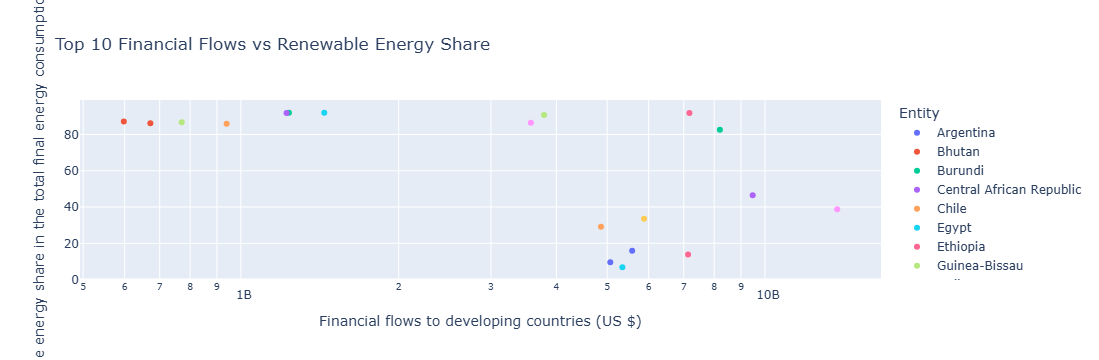

In [22]:
# Function to combine the top entities from two different criteria into a single set
def get_overall_top_entities(feature_one, feature_two):
    return set(feature_one.index).union(set(feature_two.index))

# Function for an interactive scatter plot showing the relationship between financial flows and renewable energy share for the top entities.
def plot_interactive_scatter_plot(dataframe, overall_top_entities, xlabel, ylabel, title, group_by_column):
    # Filter dataset for only these top entities
    filtered_data = dataframe[dataframe[group_by_column].isin(overall_top_entities)]

    # Aggregate financial aid and renewable energy share
    aggregated_data = filtered_data.groupby(group_by_column).agg({
        xlabel: 'sum',
        ylabel: 'mean'
    }).reset_index()

    # Create an interactive scatter plot
    fig = px.scatter(
        aggregated_data,
        x=xlabel,
        y=ylabel,
        color=group_by_column,
        labels={xlabel: xlabel, ylabel: ylabel},
        title=title,
        hover_name=group_by_column
    )

    # Use a logarithmic scale for financial aid values
    fig.update_layout(xaxis_type='log')

    # Show the figure
    fig.show()


if __name__ == "__main__":
    overall_top_entities = get_overall_top_entities(top_entities_financial_flows, top_entities_energy_use)

    plot_interactive_scatter_plot(
        energy_data,
        overall_top_entities,
        'Financial flows to developing countries (US $)',
        'Renewable energy share in the total final energy consumption (%)',
        'Top 10 Financial Flows vs Renewable Energy Share',
        'Entity'
    )

### Correlation Analysis Map

A correlational map will give us a better understanding of the important features from the data.

#### Key Observations

Highly Correlated Features:
    
    - "Access to electricity (% of population)" and "Access to clean fuels for cooking"
    - "Electricity from renewables (TWh)" and "Electricity from fossil fuels (TWh)"
    - "Electricity from fossil fuels (TWh)" and "Value_co2_emissions_kt_by_country"
    - "Electricity from renewables (TWh)" and "Value_co2_emissions_kt_by_country"
    - "Land Area(Km2)" and "Electricity from renewables (TWh)"
 
Extremely Low Correlation:
    
    - "Access to electricity (% of population)" and "Renewable energy share in total final energy consumption (%)"
    - "Access to clean fuels for cooking" and "Renewable energy share in total final energy consumption (%)"

An initial look at the map gives some idea of the relationships between the features. 

The carbon dioxide emissions are affected by the source of electricity generation, whether from fossil fuels or renewables, which was to be expected. Additionally, access to electricity significantly impacts access to clean fuels for cooking, highlighting the interconnectedness of energy accessibility and household energy consumption. It is also worth noting the correlation between electricity from renewables and land area, suggesting that larger land areas might enable greater capacity for renewable energy production.

There is a surprising lack of significant correlation between renewable energy share and access to electricity or access to clean fuels for cooking. This may indicate that renewable energy adoption does not directly translate into improved energy accessibility or cleaner cooking methods.

Furthermore, financial aid and electricity generation do not appear to have a strong influence on GDP growth in this dataset. This could suggest that other factors, such as economic policies or industrialisation levels, play a more dominant role in driving GDP growth.

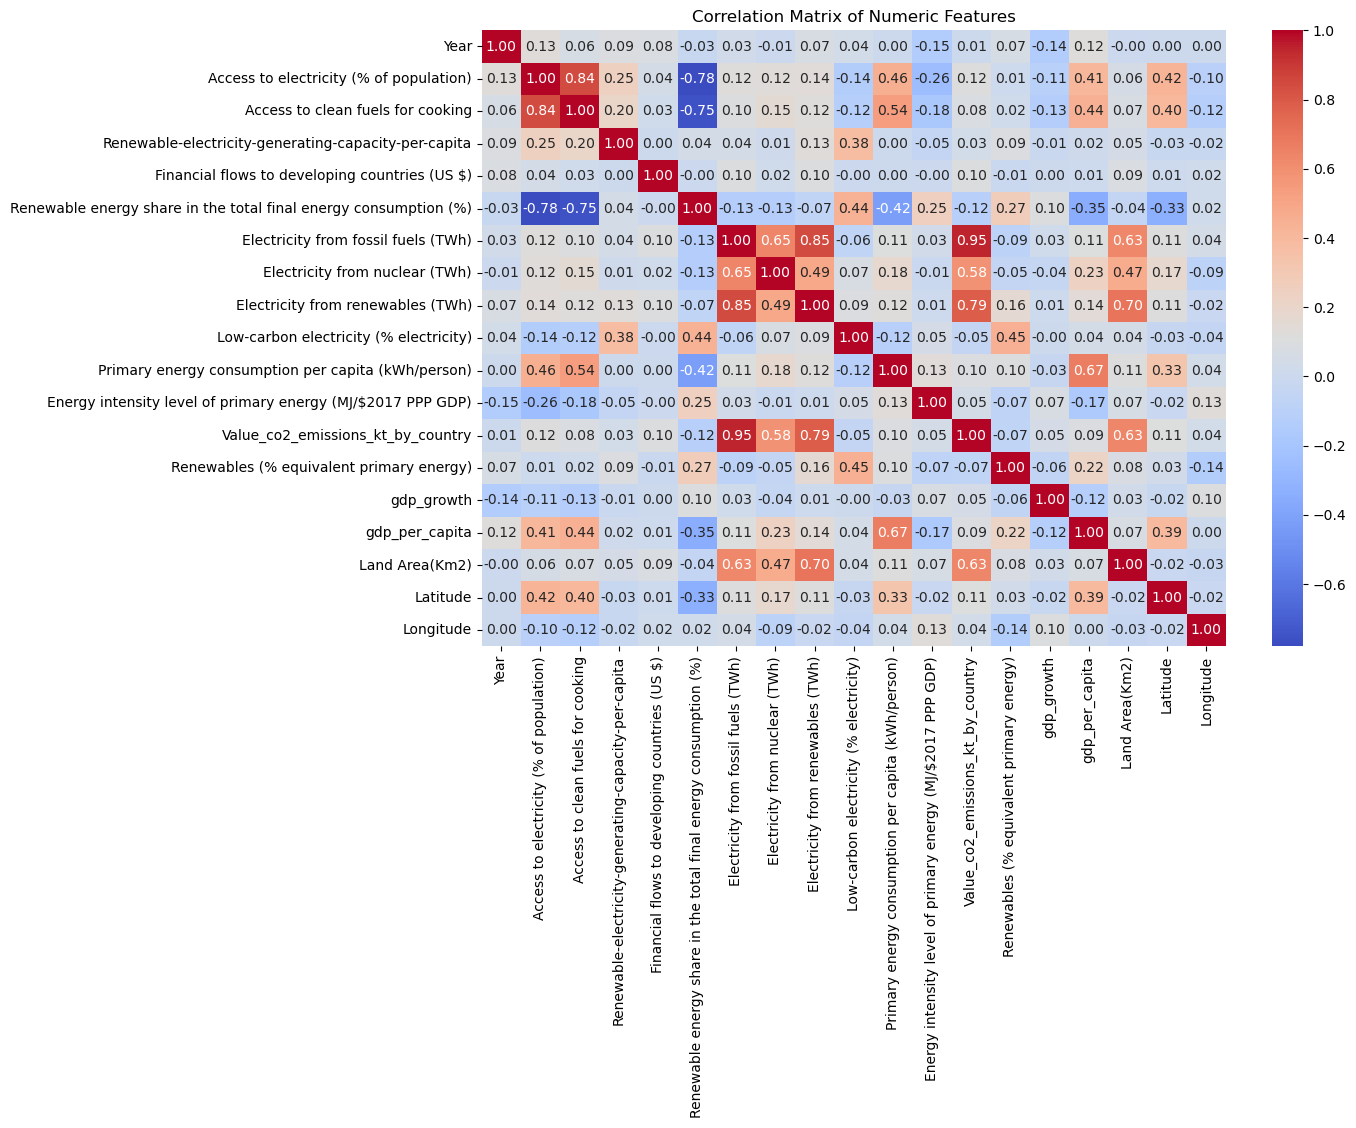

In [26]:
# Function to compute correlation matrix
def plot_correlation_matrix(dataframe, title='Correlation Matrix of Numeric Features'):
    # Select only numeric columns
    numeric_data = dataframe.select_dtypes(include=['float64', 'int64'])

    # Compute the correlation matrix
    corr = numeric_data.corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

    # Set title
    plt.title(title)

    # Show plot
    plt.show()

if __name__ == "__main__":
    plot_correlation_matrix(energy_data)

### Time-Series Analysis on High Correlations

Investigating further of the most correlated features, and their trends over time.

The graphs below provide several key insights into the relationships within the dataset:

1. **Access to Electricity and Clean Fuels for Cooking**:  
   The trends indicate that access to electricity directly influences access to clean cooking fuels. Both feaes tursh it parallel growth over the years, suggesting that increased electricity access may promote the adoption of cleaner cooking methods.

2. **Electricity from Renewables and Land Area**:  
   Renewable electricity generation appears to be independent of land area. While renewable electricity shows consistent growth, the land area remains constant. This suggests that the increase in renewable energy is likely driven by advancements in efficiency, infrastructure, or sptimized land usage rather than physical land expansion.

3. **Carbon Dioxide Emissions and Energy Sources**:  
   A significant drop in carbon dioxide emissions is observed after 2018. While electricity from fossil fuels shows an inconsistent trend, renewable electricity continues to rise steadily. This highlights the potential impact of transitioning to renewable energy sources in reducing carbon eissions.
missions.

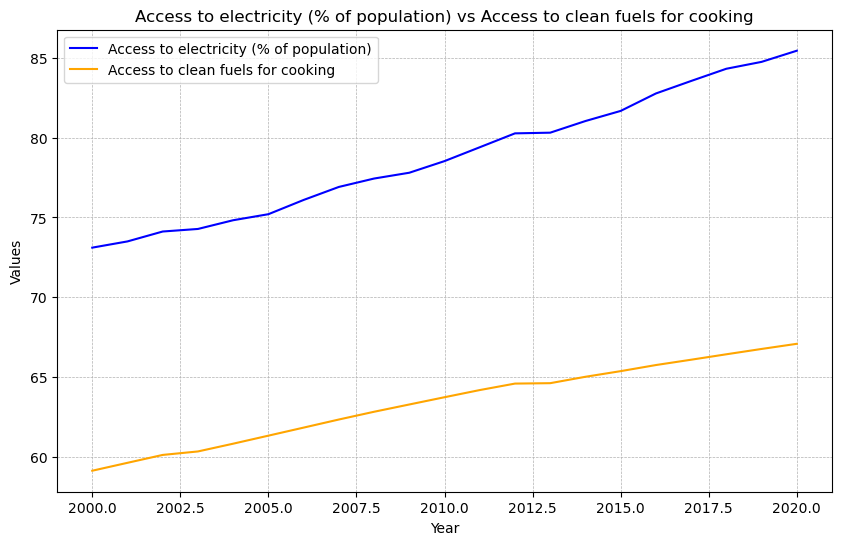

In [29]:
# Function to group data and calculate mean
def group_data(dataframe, group_by_column, feature_one, feature_two):
    return dataframe.groupby(group_by_column)[[feature_one, feature_two]].mean()

# Function to plots a line graph for two features over a grouped index
def plot_line_graph(dataframe, feature_one, feature_two, group_by_column, ylabel='Values', title=''):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe[feature_one], label=feature_one, color='blue')
    plt.plot(dataframe.index, dataframe[feature_two], label=feature_two, color='orange')

    # Add labels, title, and legend
    plt.xlabel(group_by_column)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

if __name__ == "__main__":
    # Group data
    grouped_data = group_data(
        energy_data, 'Year', 
        'Access to electricity (% of population)', 
        'Access to clean fuels for cooking'
    )

    # Generate and show the plot
    plot_line_graph(
        grouped_data, 
        'Access to electricity (% of population)', 
        'Access to clean fuels for cooking', 
        'Year', 
        ylabel='Values', 
        title='Access to electricity (% of population) vs Access to clean fuels for cooking'
    )

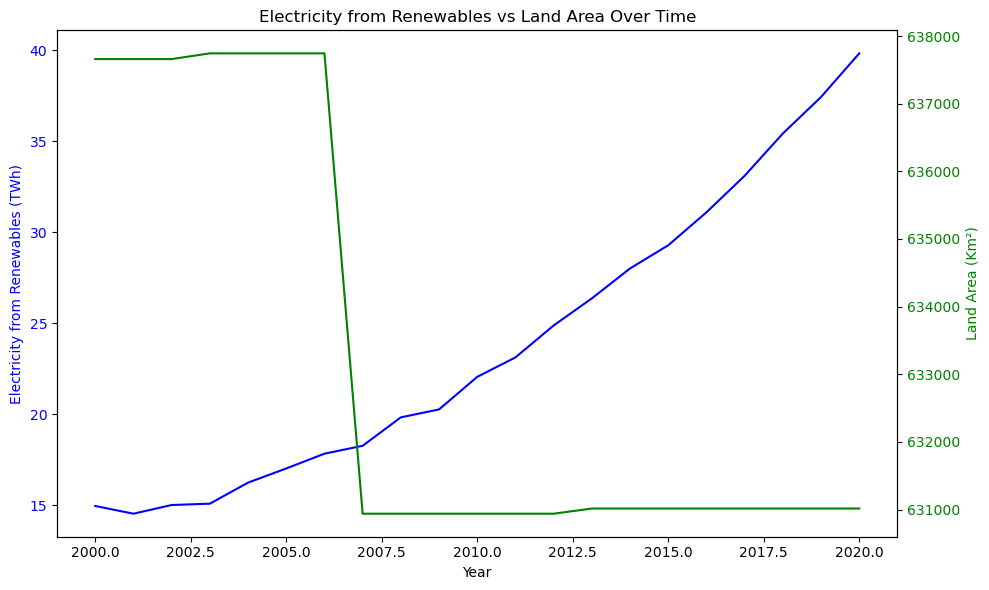

In [30]:
# A dual axis chart is being used due to make it easier to compare since the features have different scales.
# Function for dual axis chart
def plot_dual_axis(dataframe, x_column, y1_column, y2_column, y1_label, y2_label, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot first feature (left y-axis)
    ax1.plot(dataframe.index, dataframe[y1_column], color='blue', label=y1_label)
    ax1.set_xlabel(x_column)
    ax1.set_ylabel(y1_label, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create second y-axis
    ax2 = ax1.twinx()
    ax2.plot(dataframe.index, dataframe[y2_column], color='green', label=y2_label)
    ax2.set_ylabel(y2_label, color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add title
    plt.title(title)
    plt.tight_layout()

    # Show plot
    plt.show()

if __name__ == "__main__":
    grouped_data = group_data(energy_data, 'Year', 'Electricity from renewables (TWh)', 'Land Area(Km2)')
    plot_dual_axis(
        grouped_data, 'Year',
        'Electricity from renewables (TWh)', 'Land Area(Km2)',
        'Electricity from Renewables (TWh)', 'Land Area (Km²)',
        'Electricity from Renewables vs Land Area Over Time'
    )

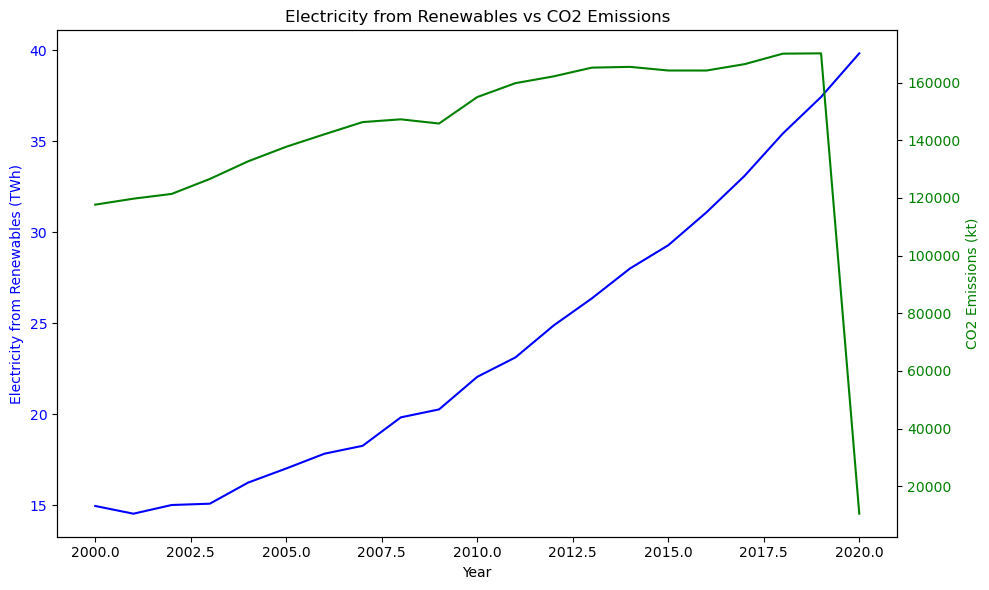

In [31]:
if __name__ == "__main__":
    grouped_data = group_data(energy_data, 'Year', 'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country')
    plot_dual_axis(
        grouped_data, 'Year',
        'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country',
        'Electricity from Renewables (TWh)', 'CO2 Emissions (kt)',
        'Electricity from Renewables vs CO2 Emissions'
    )

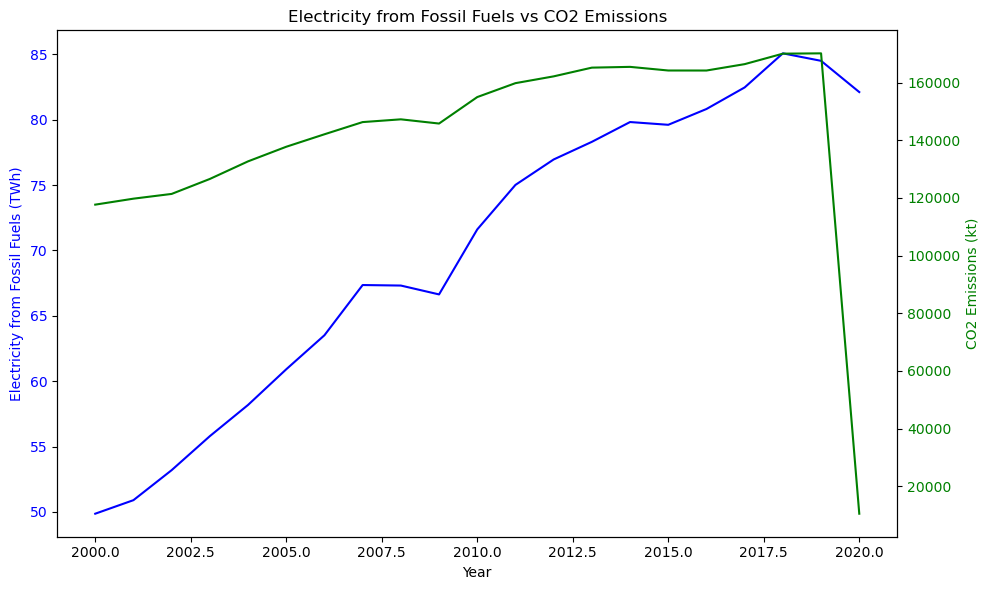

In [32]:
if __name__ == "__main__":
    grouped_data = group_data(energy_data, 'Year', 'Electricity from fossil fuels (TWh)', 'Value_co2_emissions_kt_by_country')
    plot_dual_axis(
        grouped_data, 'Year',
        'Electricity from fossil fuels (TWh)', 'Value_co2_emissions_kt_by_country',
        'Electricity from Fossil Fuels (TWh)', 'CO2 Emissions (kt)',
        'Electricity from Fossil Fuels vs CO2 Emissions'
    )

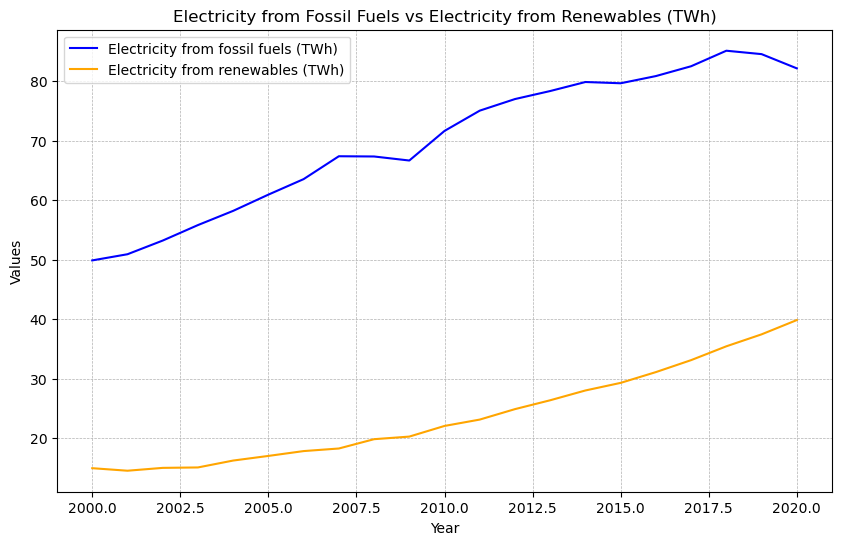

In [33]:
if __name__ == "__main__":
    grouped_data = group_data(
        energy_data, 'Year', 
        'Electricity from fossil fuels (TWh)', 
        'Electricity from renewables (TWh)'
    )

    plot_line_graph(
        grouped_data, 
        'Electricity from fossil fuels (TWh)', 
        'Electricity from renewables (TWh)', 
        'Year', 
        ylabel='Values', 
        title='Electricity from Fossil Fuels vs Electricity from Renewables (TWh)'
    )

### Analysis on Low Correlations

Using box-and-whisker diagrams to identify patterns, outliers, or variability in the data.

From the diagrams below, the contrast in distributions between access to electricity and renewable energy share supports the observation of low correlation. Access to electricity is nearly universal in many places, while renewable energy adoption varies widely. This suggests that high access to electricity does not necessarily imply a higher share of renewable energy. Factors such as infrastructure, policies, and economic priorities might play a role in the renewable energy share.

Furthermore, the stark difference in distributions between access to clean fuels for cooking and renewable energy share aligns with their low correlation. While access to clean cooking fuels seems to be a policy or infrastructure-driven metric, renewable energy share appears more influenced by energy policies or resource availability. The lack of correlation might indicate that access to clean fuels for cooking doesn't directly depend on renewable energy sources. It could be achieved through other means like improved cooking technologies or subsidies for cleaner fuels.

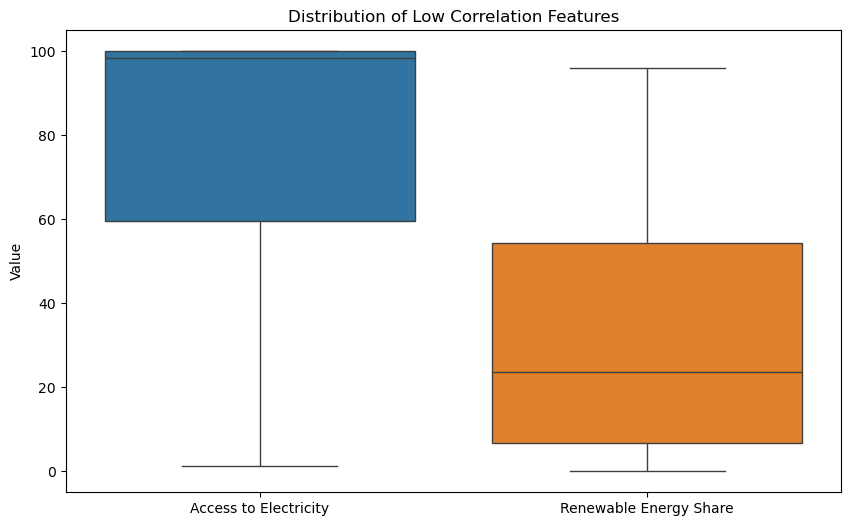

In [36]:
# Function to create box-and-whisker diagram for least correlated features
def plot_multiple_boxplots(dataframe, columns, title, labels):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe[columns])

    # Add title and labels
    plt.title(title)
    plt.ylabel('Value')
    plt.xticks(ticks=range(len(labels)), labels=labels)

    # Show plot
    plt.show()

if __name__ == "__main__":
    plot_multiple_boxplots(
        energy_data,
        ['Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)'],
        'Distribution of Low Correlation Features',
        ['Access to Electricity', 'Renewable Energy Share']
    )

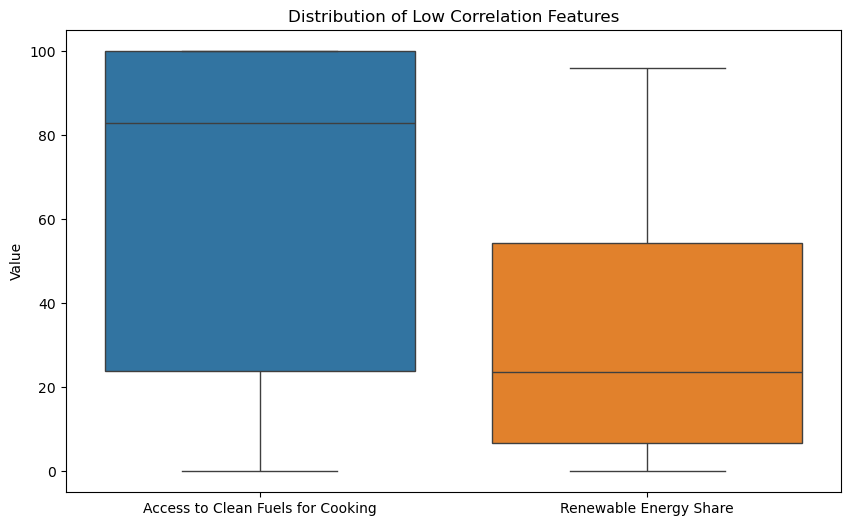

In [37]:
if __name__ == "__main__":
    plot_multiple_boxplots(
        energy_data,
        ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)'],
        'Distribution of Low Correlation Features',
        ['Access to Clean Fuels for Cooking', 'Renewable Energy Share']
    )

## Long Short-Term Memory Networks (LSTMs)

We will be using the LSTM for our forecasting of future values. The first step in forecasting is preparing the data.

The data will be split into a training set and a testing set, the training will be done on the data from the earlier years, so that we can test the most recent years.

Feature engineering is crucial for improving forecasting accuracy. Therefore, we will incorporate lag features, which captures the direct relationship between the current value and past values at specific time steps; these features are often strong predictors of future values.

We will start by training the data with Ethiopia since it appears in both top financial aid and top renewable energy lists which suggests a strong link between investment and adoption.

The primary target variable for forecasting is "Electricity from renewables (TWh)."

In [39]:
# Function to prepare time-series data for a specific entity
def prepare_time_series(dataframe, target, entity, lags=3, split_ratio=0.8):
    # Filter data for the selected entity
    dataframe = dataframe[dataframe['Entity'] == entity].copy()

    # Maintain chronological order
    dataframe = dataframe.sort_values('Year').copy()

    # Create lag features
    for lag in range(1, lags + 1):
        dataframe[f'{target}_lag_{lag}'] = dataframe[target].shift(lag)

    # Drop rows with NaN values due to lagging
    dataframe = dataframe.dropna()

    # Exclude non-numeric columns before scaling
    numeric_df = dataframe.select_dtypes(include=['number']).copy()

    # Define features and target
    X = numeric_df.drop(columns=[target])
    y = numeric_df[target].values.reshape(-1, 1)  # Reshape y for scaler

    # Initialize scalers
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    # Scale features and target
    X_scaled = X_scaler.fit_transform(X)
    y_scaled = y_scaler.fit_transform(y)

    # Split data into training and testing sets
    train_size = int(len(numeric_df) * split_ratio)
    X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
    y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

    # Ensure consistent number of samples
    min_samples = min(len(X_test), len(y_test))
    X_test, y_test = X_test[:min_samples], y_test[:min_samples]


    print(f"Training set size for {entity}: {len(X_train)}")
    print(f"Testing set size for {entity}: {len(X_test)}")

    return X_train, X_test, y_train, y_test, X_scaler, y_scaler

if __name__ == "__main__":
    selected_entity = "Ethiopia"
    X_train, X_test, y_train, y_test, X_scaler, y_scaler = prepare_time_series(
        energy_data, 'Electricity from renewables (TWh)', selected_entity, lags=3
    )

Training set size for Ethiopia: 14
Testing set size for Ethiopia: 4


In [40]:
# Function to reshape data for LSTM
def reshape_for_lstm(X_train, X_test, lags):
    num_features = X_train.shape[1] // lags  # Feature count
    
    # Check if X_test has enough samples
    if X_test.shape[0] < lags:
        raise ValueError(f"Not enough test samples ({X_test.shape[0]}) for {lags} lags.")

    X_train_reshaped = X_train.reshape(X_train.shape[0], lags, num_features)
    X_test_reshaped = X_test.reshape(X_test.shape[0], lags, num_features)

    print(f"New shape of X_train: {X_train_reshaped.shape}")
    print(f"New shape of X_test: {X_test_reshaped.shape}")

    return X_train_reshaped, X_test_reshaped, num_features

if __name__ == "__main__":
    X_train_reshaped, X_test_reshaped, num_features = reshape_for_lstm(X_train, X_test, lags=3)

New shape of X_train: (14, 3, 7)
New shape of X_test: (4, 3, 7)


In [41]:
# Function to build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(50, activation='relu', return_sequences=True),
        LSTM(50, activation='relu'),
        Dense(1)  # Output layer with one neuron for regression
    ])

    model.compile(optimizer='adam', loss='mse')
    return model

if __name__ == "__main__":
    input_shape = (3, num_features)
    lstm_model = build_lstm_model(input_shape)
    lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
save_dir = os.path.join(os.getcwd(), "models")

# Function to save the trained LSTM model and scalers
def save_model_and_scalers(model, X_scaler, y_scaler, entity):
    model_path = os.path.join(save_dir, f"lstm_model_{entity}.keras")
    X_scaler_path = os.path.join(save_dir, f"X_scaler_{entity}.pkl")
    y_scaler_path = os.path.join(save_dir, f"y_scaler_{entity}.pkl")
    
    model.save(model_path)
    joblib.dump(X_scaler, X_scaler_path)
    joblib.dump(y_scaler, y_scaler_path)
    
    print(f"Model and scalers saved for {entity} in {save_dir}")

In [72]:
# Function to load trained model and scalers for a selected entity
def load_model_and_scalers(entity):
    models_dir = os.path.join(os.getcwd(), "models")  # Ensure we load from models folder
    model = keras.models.load_model(os.path.join(models_dir, f"lstm_model_{entity}.keras"))
    X_scaler = joblib.load(os.path.join(models_dir, f"X_scaler_{entity}.pkl"))
    y_scaler = joblib.load(os.path.join(models_dir, f"y_scaler_{entity}.pkl"))
    return model, X_scaler, y_scaler

In [ ]:
# Function to train the LSTM model
def train_lstm_model(model, X_train, y_train, epochs=10, batch_size=16):
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Stop unnecessary training when there are no more improvements
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1,
        callbacks=[early_stopping]
    )
    return history

if __name__ == "__main__":
    entity_list = energy_data['Entity'].unique()  # Get a list of unique entities
    
    for entity in entity_list:
        print(f"Training model for {entity}...")

        # Prepare time-series data
        X_train, X_test, y_train, y_test, X_scaler, y_scaler = prepare_time_series(
            energy_data, 'Electricity from renewables (TWh)', entity, lags=3
        )

        # Reshape data for LSTM
        X_train, X_test, num_features = reshape_for_lstm(X_train, X_test, lags=3)

        # Define input shape dynamically
        input_shape = (3, num_features)  # (timesteps, features)

        # Build and train the LSTM model
        model = build_lstm_model(input_shape)
        train_lstm_model(model, X_train, y_train, epochs=30)

        # Save the trained model and scalers
        save_model_and_scalers(model, X_scaler, y_scaler, entity)

        print(f"Model and scalers saved for {entity}")

Training model for Afghanistan...
Training set size for Afghanistan: 12
Testing set size for Afghanistan: 3
New shape of X_train: (12, 3, 7)
New shape of X_test: (3, 3, 7)
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2601 - val_loss: 0.9455
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.2546 - val_loss: 0.9322
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.2491 - val_loss: 0.9188
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 0.2435 - val_loss: 0.9051
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2380 - val_loss: 0.8910
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2326 - val_loss: 0.8767
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.2271 - val_loss: 0.8618
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.2215 - val_loss: 0.8463
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.2158 - val_loss: 0.8305
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2100 - val_los

#### Evaluating the LSTM Model

We evaluated the model using India as the selected entity, as it receives the highest financial flow. The results show a Mean Absolute Error (MAE) of 50.22, a Root Mean Squared Error (RMSE) of 56.11, and a Mean Absolute Percentage Error (MAPE) of 17.19%.

While the predictions are not highly accurate, the deviation remains below 20%. Given the project’s constraints, such as the small dataset and limited training epochs, these results are reasonable. Therefore, we can proceed with forecasting.

In [74]:
# Function to evaluate the model
def evaluate_lstm_model(model, X_test, y_test, y_scaler):
    
    X_test = np.array(X_test)
    
    # Make predictions
    y_pred_scaled = model.predict(X_test)
    print(f"y_pred_scaled shape: {y_pred_scaled.shape}")
    
    # Inverse transform predictions and actual values
    y_pred = y_scaler.inverse_transform(y_pred_scaled)
    y_actual = y_scaler.inverse_transform(y_test)

    # Compute evaluation metrics
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

    return mae, rmse, mape

if __name__ == "__main__":
    
    selected_entity = "India"

    # Prepare time series data
    X_train, X_test, y_train, y_test, X_scaler, y_scaler = prepare_time_series(
        energy_data, 'Electricity from renewables (TWh)', selected_entity, lags=3
    )

    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

    # Reshape data for LSTM
    X_train_reshaped, X_test_reshaped, num_features = reshape_for_lstm(X_train, X_test, lags=3)

    print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

    # Load the trained model and scalers
    model, X_scaler, y_scaler = load_model_and_scalers(selected_entity)

    # Evaluate the model
    print(f"Evaluating model for {selected_entity}...")
    mae, rmse, mape = evaluate_lstm_model(model, X_test_reshaped, y_test, y_scaler)

Training set size for India: 14
Testing set size for India: 4
X_train shape: (14, 21), X_test shape: (4, 21)
y_train shape: (14, 1), y_test shape: (4, 1)
New shape of X_train: (14, 3, 7)
New shape of X_test: (4, 3, 7)
X_test_reshaped shape: (4, 3, 7)
Evaluating model for India...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
y_pred_scaled shape: (4, 1)
Mean Absolute Error (MAE): 50.2229
Root Mean Squared Error (RMSE): 56.1131
Mean Absolute Percentage Error (MAPE): 17.1889


## Forecasting

Now that we have completed exploratory data analysis, building and training an LSTM model, and evaluating its performance, we will move on to forecasting future trends in sustainable energy growth.

Within the forecasting, we will be choosing a specific entity and a specific number of years that can be modified according to user needs.

By providing insights into future trends, this tool can help investors make informed decisions about sustainable energy investments.

Training set size for India: 18
Testing set size for India: 0
Last known values shape: (1, 3, 7)
Expected model input shape: (None, 3, 7)
Actual last_known_values shape: (1, 3, 7)
Forecasted Renewable Energy Generation for India:
   Year  Predicted Renewable Energy (TWh)
0  2021                        231.985275
1  2022                        191.891464
2  2023                        153.885971
3  2024                        117.043411
4  2025                        113.439743
5  2026                        110.707649
6  2027                        109.192444


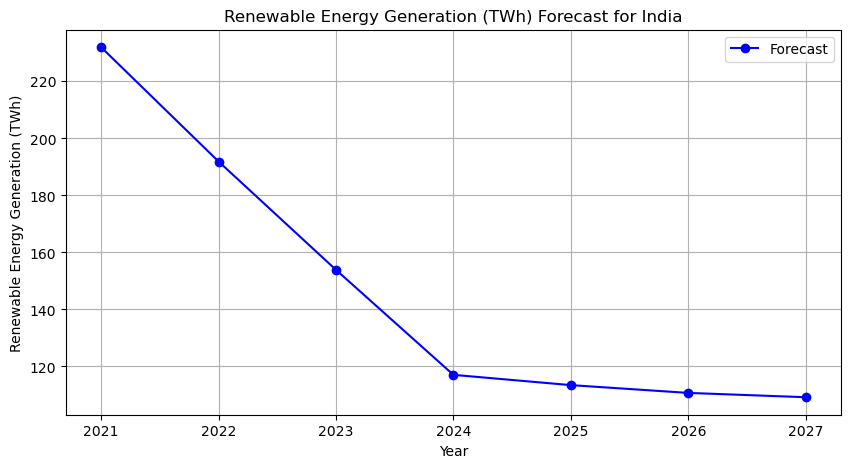

In [92]:
# Function to get last known values for the selected entity
def get_last_known_values(entity, dataframe, X_scaler, target="Electricity from renewables (TWh)", lags=3):
    # Prepare time-series data (without splitting)
    X_train, _, _, _, X_scaler, y_scaler = prepare_time_series(
        dataframe, target, entity, lags=lags, split_ratio=1.0  # Use full data, no train-test split
    )

    # Reshape X_train to match the LSTM input shape
    num_features = X_train.shape[1] // lags  # Feature count
    X_train_reshaped = X_train.reshape(X_train.shape[0], lags, num_features)

    # Extract last known values
    last_known_values = X_train_reshaped[-1:].reshape(1, lags, num_features)  # Ensure (1, 3, 7)

    print(f"Last known values shape: {last_known_values.shape}")
    
    return last_known_values, y_scaler

# Forecast function
def forecast_future(model, X_scaler, y_scaler, last_known_values, num_years=7):
    future_predictions = []
    last_known_values = np.array(last_known_values)

    # Ensure shape is correct
    if last_known_values.shape[1] < 3:  # Check time steps
        raise ValueError(f"Insufficient time steps for forecasting: {last_known_values.shape}")

    # Reshape for LSTM
    if last_known_values.ndim == 1:
        last_known_values = last_known_values.reshape(1, 3, 1)
    elif last_known_values.ndim == 2:
        last_known_values = last_known_values.reshape(1, 3, last_known_values.shape[1])

    current_input = last_known_values

    for _ in range(num_years):
        # Make prediction
        predicted_scaled = model.predict(current_input, verbose=0)

        # Convert prediction back to original scale
        predicted_value = y_scaler.inverse_transform(predicted_scaled)[0][0]

        # Store result
        future_predictions.append(predicted_value)

        # Prepare next input (shift window)
        new_feature = np.zeros((1, 1, current_input.shape[2]))  
        new_feature[0, 0, -1] = predicted_scaled[0, 0]  

        current_input = np.append(current_input[:, 1:, :], new_feature, axis=1)

    return future_predictions

# Function to plot the forecasted values for a selected entity and feature
def plot_forecast(years, predictions, entity, feature_name):
    plt.figure(figsize=(10, 5))
    plt.plot(years, predictions, marker='o', linestyle='-', color='blue', label="Forecast")
    plt.xlabel("Year")
    plt.ylabel(feature_name)
    plt.title(f"{feature_name} Forecast for {entity}")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Select entity and number of years for forecasting
    selected_entity = "India"  # Can be modified as needed
    years_to_forecast = 7  # Can be modified as needed
    
    # Load the trained model and scalers
    model, X_scaler, y_scaler = load_model_and_scalers(selected_entity)
    
    # Get last known values
    last_known_values, y_scaler = get_last_known_values(selected_entity, energy_data, X_scaler)

    print(f"Expected model input shape: {model.input_shape}")
    print(f"Actual last_known_values shape: {last_known_values.shape}")
    
    # Ensure correct shape
    if last_known_values.shape[2] != 7:
        raise ValueError(f"Mismatch in feature count: Expected 7, but got {last_known_values.shape[2]}")

    # Forecast future values
    predictions = forecast_future(model, X_scaler, y_scaler, last_known_values, years_to_forecast)
    
    # Generate years for forecast
    future_years = np.arange(energy_data['Year'].max() + 1, energy_data['Year'].max() + 1 + years_to_forecast)
    
    # Create DataFrame for visualization
    forecast_df = pd.DataFrame({"Year": future_years, "Predicted Renewable Energy (TWh)": predictions})
    
    # Display forecast results
    print(f"Forecasted Renewable Energy Generation for {selected_entity}:")
    print(forecast_df)
    plot_forecast(future_years, predictions, selected_entity, "Renewable Energy Generation (TWh)")

Training set size for Bangladesh: 18
Testing set size for Bangladesh: 0
Last known values shape: (1, 3, 7)
Forecasted Renewable Energy Generation for Bangladesh:
   Year  Predicted Renewable Energy (TWh)
0  2021                          0.978621
1  2022                          0.846834
2  2023                          0.836497
3  2024                          0.690512
4  2025                          0.676034
5  2026                          0.667344
6  2027                          0.655694
7  2028                          0.653881
8  2029                          0.652629
9  2030                          0.651652


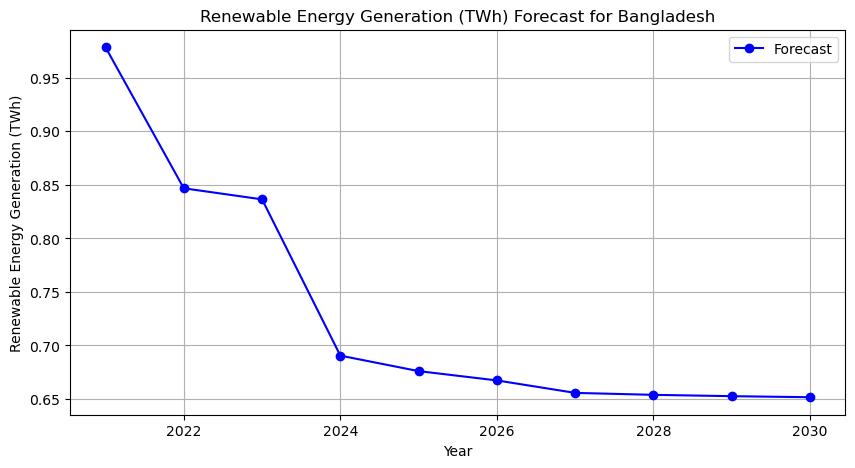

In [94]:
if __name__ == "__main__":
    selected_entity = "Bangladesh"
    years_to_forecast = 10
    
    model, X_scaler, y_scaler = load_model_and_scalers(selected_entity)
    
    last_known_values, y_scaler = get_last_known_values(selected_entity, energy_data, X_scaler)

    predictions = forecast_future(model, X_scaler, y_scaler, last_known_values, years_to_forecast)
    future_years = np.arange(energy_data['Year'].max() + 1, energy_data['Year'].max() + 1 + years_to_forecast)
    
    forecast_df = pd.DataFrame({"Year": future_years, "Predicted Renewable Energy (TWh)": predictions})
    
    print(f"Forecasted Renewable Energy Generation for {selected_entity}:")
    print(forecast_df)
    plot_forecast(future_years, predictions, selected_entity, "Renewable Energy Generation (TWh)")

Training set size for Malaysia: 18
Testing set size for Malaysia: 0
Last known values shape: (1, 3, 7)
Forecasted Renewable Energy Generation for Malaysia:
   Year  Predicted Renewable Energy (TWh)
0  2021                         12.549787
1  2022                         10.300458
2  2023                          9.276826
3  2024                          7.575340
4  2025                          7.510414
5  2026                          7.470240
6  2027                          7.440231
7  2028                          7.438408
8  2029                          7.437353
9  2030                          7.436846


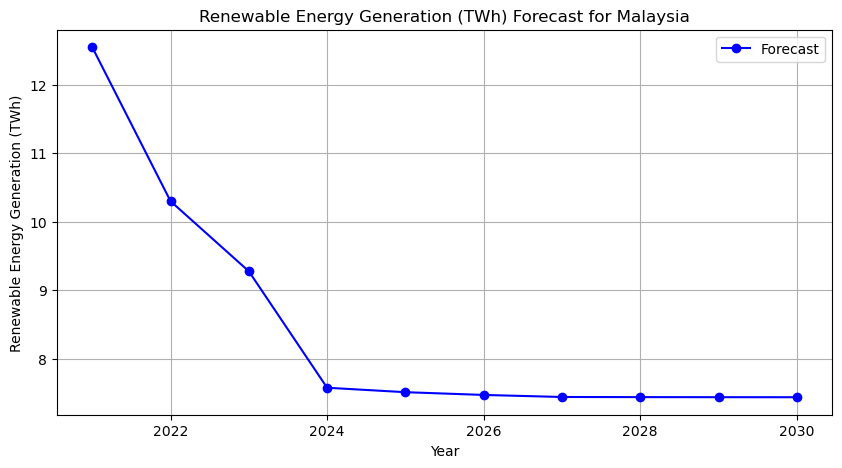

In [98]:
if __name__ == "__main__":
    selected_entity = "Malaysia"
    years_to_forecast = 10
    
    model, X_scaler, y_scaler = load_model_and_scalers(selected_entity)
    
    last_known_values, y_scaler = get_last_known_values(selected_entity, energy_data, X_scaler)

    predictions = forecast_future(model, X_scaler, y_scaler, last_known_values, years_to_forecast)
    future_years = np.arange(energy_data['Year'].max() + 1, energy_data['Year'].max() + 1 + years_to_forecast)
    
    forecast_df = pd.DataFrame({"Year": future_years, "Predicted Renewable Energy (TWh)": predictions})
    
    print(f"Forecasted Renewable Energy Generation for {selected_entity}:")
    print(forecast_df)
    plot_forecast(future_years, predictions, selected_entity, "Renewable Energy Generation (TWh)")